# Problema obligatorio 2: Simulación del Modelo de Ising

### Temperatura 1.5 $K$, Configuración aleatoria

##### Coste computacional: evaluación del tiempo de ejecución en función de $N^2$

| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.02                  | 0.01                 |     |
| $100 \times 20^2 = 40000$  | 0.07                  | 0.05                 |     |
| $100 \times 30^2 = 90000$  | 0.22                  | 0.14                 |      |
| $100 \times 40^2 = 160000$ | 0.47                  | 0.30                 |     |
| $100 \times 50^2 = 250000$ | 0.82                  | 0.60                |     |
| $100 \times 60^2 = 360000$ | 1.36                  | 1.09                 |      |
| $100 \times 70^2 = 490000$ | 2.0                   | 1.69                 |      |
| $100 \times 80^2 = 640000$ | 3.54                  | 2.40                 |     |
| $100 \times 90^2 = 810000$ | 5.19                  | 3.47                 |    |
| $100 \times 100^2 = 1000000$| 11.01                 | 4.98                |      |
| $100 \times 110^2 = 1210000$| 13.27                 | 6.58                 |      |
| $100 \times 120^2 = 1440000$| 18.07                 | 8.62                 |      |
| $100 \times 130^2 = 1690000$| 26.41                 | 11.01                 |    |
| $100 \times 140^2 = 1960000$|                  |  13.81                |    |
| $100 \times 150^2 = 2250000$|                  |  17.42                |    |
| $100 \times 160^2 = 2560000$|                  |  22.57              |    |
| $100 \times 170^2 = 2890000$|                  |  25.22               |    |
| $100 \times 180^2 = 3240000$|                  |  30.13              |    |
| $100 \times 190^2 = 3610000$|                  |  35.91               |    |
| $100 \times 200^2 = 4000000$|                  |  42.09               |    |

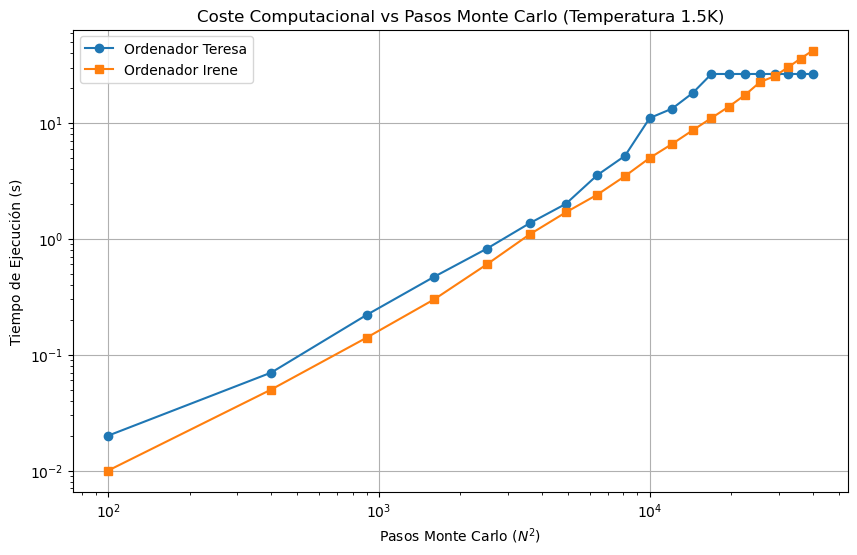

In [ ]:
# Celda de Python para graficar el coste computacional

import matplotlib.pyplot as plt

# Datos de los pasos Monte Carlo y tiempos de ejecución
N_squared = [100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000, 12100, 14400, 16900, 19600, 22500, 25600, 28900, 32400, 36100, 40000]
teresa_times = [0.02, 0.07, 0.22, 0.47, 0.82, 1.36, 2.0, 3.54, 5.19, 11.01, 13.27, 18.07, 26.41, 26.41, 26.41, 26.41, 26.41, 26.41, 26.41, 26.41]
irene_times = [0.01, 0.05, 0.14, 0.30, 0.60, 1.09, 1.69, 2.40, 3.47, 4.98, 6.58, 8.62, 11.01, 13.81, 17.42, 22.57, 25.22, 30.13, 35.91, 42.09]
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(N_squared, teresa_times, label="Ordenador Teresa", marker='o')
plt.plot(N_squared, irene_times, label="Ordenador Irene", marker='s')

# Configuración de la gráfica
plt.title("Coste Computacional vs Pasos Monte Carlo (Temperatura 1.5K)")
plt.xlabel("Pasos Monte Carlo ($N^2$)")
plt.ylabel("Tiempo de Ejecución (s)")
plt.legend()
plt.grid(True)
plt.xscale("log")  # Escala logarítmica para el eje x
plt.yscale("log")  # Escala logarítmica para el eje y

# Mostrar la gráfica
plt.show()

### Temperatura 2 $K$, Configuración aleatoria

### Temperatura critica , Configuración aleatoria

### Temperatura 3 $K$, Configuración ordenada

##### Coste computacional: evaluación del tiempo de ejecución en función de $N^2$

| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.02                  |  0.01                |     |
| $100 \times 20^2 = 40000$  | 0.06                  |  0.04                |     |
| $100 \times 30^2 = 90000$  | 0.13                  |  0.10               |      |
| $100 \times 40^2 = 160000$ | 0.21                  |  0.18               |     |
| $100 \times 50^2 = 250000$ | 0.40                  |  0.26                |     |
| $100 \times 60^2 = 360000$ | 0.55                  |  0.41                |      |
| $100 \times 70^2 = 490000$ | 0.83                   | 0.59                |      |
| $100 \times 80^2 = 640000$ | 1.05                  |  0.77               |     |
| $100 \times 90^2 = 810000$ | 1.36                  |  1.13              |     |
| $100 \times 100^2 = 1000000$| 1.76                 |  1.34              |      |
| $100 \times 110^2 = 1210000$| 2.13                 |  1.74               |      |
| $100 \times 120^2 = 1440000$| 2.49                 |  2.01               |      |
| $100 \times 130^2 = 1690000$| 2.49                 |  2.72               |    |
| $100 \times 140^2 = 1960000$| 2.49                 |  3.10                |    |
| $100 \times 150^2 = 2250000$| 2.49                 |  3.40                |    |
| $100 \times 160^2 = 2560000$| 2.49                 |  4.31              |    |
| $100 \times 170^2 = 2890000$| 2.49                 |  5.20               |    |
| $100 \times 180^2 = 3240000$| 2.49                 |  5.67              |    |
| $100 \times 190^2 = 3610000$| 2.49                 |  6.81               |    |
| $100 \times 200^2 = 4000000$| 2.49                 |  7.67               |    |

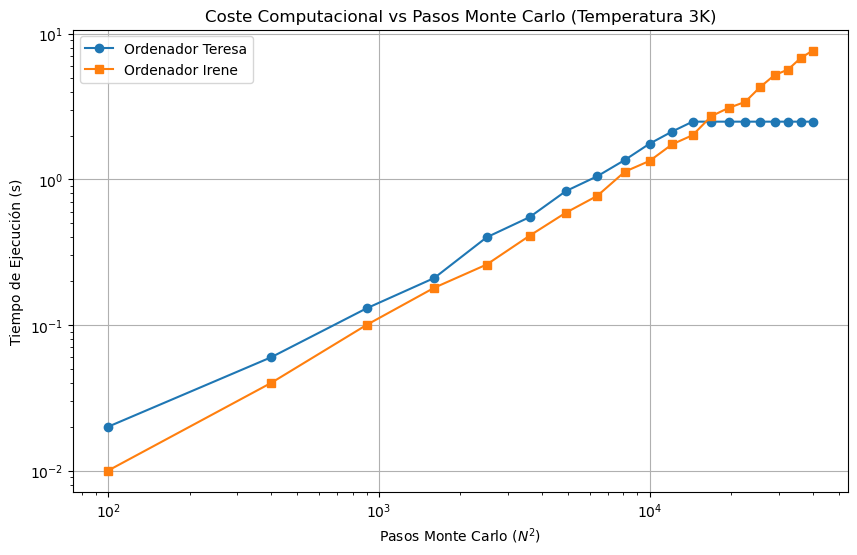

In [4]:
# Celda de Python para graficar el coste computacional a 3K

import matplotlib.pyplot as plt

# Datos de los pasos Monte Carlo y tiempos de ejecución para 3K
N_squared = [100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000, 12100, 14400, 16900, 19600, 22500, 25600, 28900, 32400, 36100, 40000]
teresa_times = [0.02, 0.06, 0.13, 0.21, 0.40, 0.55, 0.83, 1.05, 1.36, 1.76, 2.13, 2.49, 2.49, 2.49, 2.49, 2.49, 2.49, 2.49, 2.49, 2.49]
irene_times = [0.01, 0.04, 0.10, 0.18, 0.26, 0.41, 0.59, 0.77, 1.13, 1.34, 1.74, 2.01, 2.72, 3.10, 3.40, 4.31, 5.20, 5.67, 6.81, 7.67]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(N_squared, teresa_times, label="Ordenador Teresa", marker='o')
plt.plot(N_squared, irene_times, label="Ordenador Irene", marker='s')

# Configuración de la gráfica
plt.title("Coste Computacional vs Pasos Monte Carlo (Temperatura 3K)")
plt.xlabel("Pasos Monte Carlo ($N^2$)")
plt.ylabel("Tiempo de Ejecución (s)")
plt.legend()
plt.grid(True)
plt.xscale("log")  # Escala logarítmica para el eje x
plt.yscale("log")  # Escala logarítmica para el eje y

# Mostrar la gráfica
plt.show()